# # Import Libraries

In [1]:
from google.colab import files
uploaded = files.upload()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score , mean_absolute_error ,mean_squared_error

# LinearRegession
from sklearn.linear_model import LinearRegression
# Lasso
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
# Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# DecisionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV



Saving Data_Train.xlsx to Data_Train.xlsx


#  Explore DataSets

In [2]:
df1 = pd.read_excel("Data_Train.xlsx")

In [3]:
df1.shape

(10683, 11)

In [4]:
df1.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [5]:
df1.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df1.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
df1.shape

(10683, 11)

# Understand Dataset
### size of Trainning DataSet -->> 10683
### size of Test DataSet -->> 2671

# Features
### Airline -->>-->-->	The name of the Airline
### Date_of_Journey --> The Date of the Journey
### Source -->-->-->--> The source from which the service begins
### Destination -->-->  The Destination where the service begins
### Route -->-->-->-->  The route taken by the flight to reach the destination
### Dep_Time -->-->-->  The Time when the journey start from the source
### Arrival_Time -->    Time for Arrival for the destination
### Duration -->-->-->  Total Duration of Flight
### Total_Stops -->     Total stops between the source and destination
### Additional_Info --> Aditional information about the flight
### Price -->-->-->-->  The Price of the Ticket


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df1.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#  Data Analysis And Visualization on train dataSet

In [10]:
df1["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [11]:
for i in df1:
    print(f"Number of unique values in {i} -->> {df1[i].nunique()}")

Number of unique values in Airline -->> 12
Number of unique values in Date_of_Journey -->> 44
Number of unique values in Source -->> 5
Number of unique values in Destination -->> 6
Number of unique values in Route -->> 128
Number of unique values in Dep_Time -->> 222
Number of unique values in Arrival_Time -->> 1343
Number of unique values in Duration -->> 368
Number of unique values in Total_Stops -->> 5
Number of unique values in Additional_Info -->> 10
Number of unique values in Price -->> 1870


In [12]:
for i in df1:
    print(df1[i].value_counts())

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    

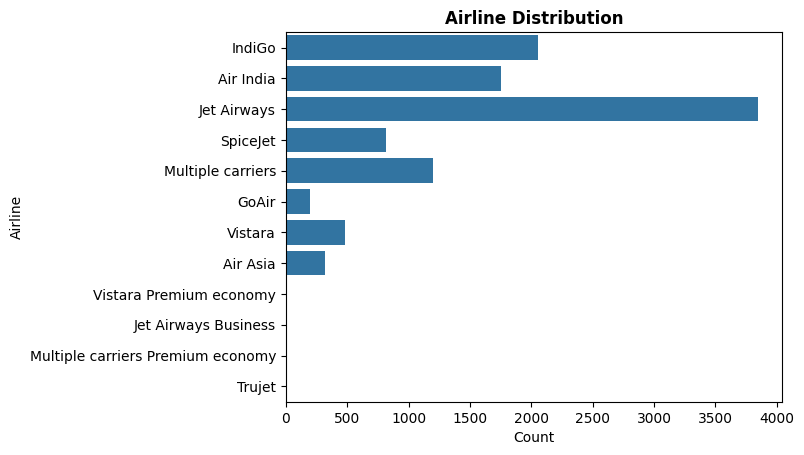

In [13]:
sns.countplot(df1["Airline"])
plt.title("Airline Distribution" , fontweight ="bold")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

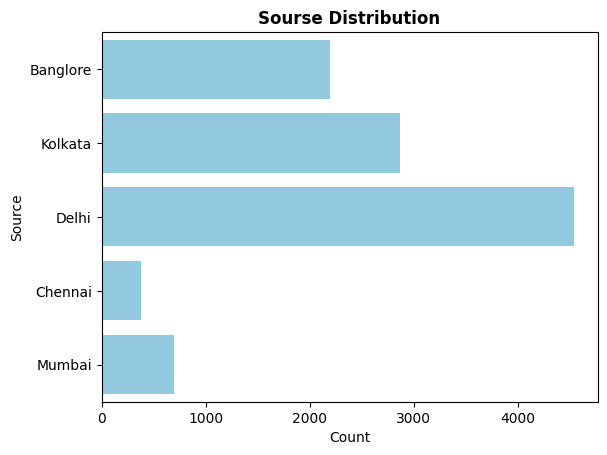

In [14]:
sns.countplot(df1["Source"] , color="skyblue")
plt.title("Sourse Distribution" , fontweight ="bold")
plt.xlabel("Count")
plt.ylabel("Source")
plt.show()

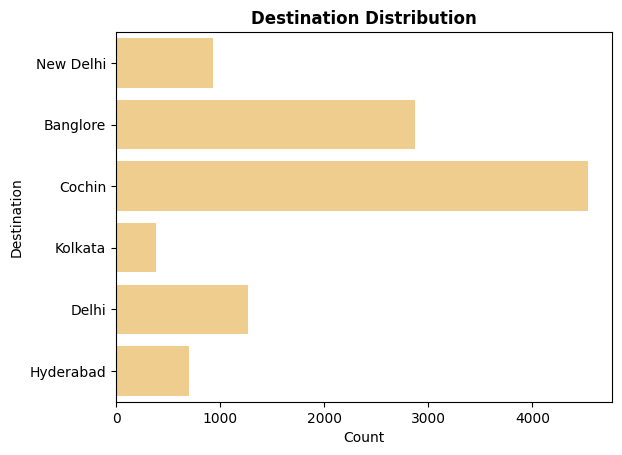

In [15]:
sns.countplot(df1["Destination"] , color="orange" , alpha=0.5)
plt.title("Destination Distribution" , fontweight ="bold")
plt.xlabel("Count")
plt.ylabel("Destination")
plt.show()

In [16]:
# Top 10 used Routes and visualize using barplot
top_routes = df1["Route"].value_counts().sort_values(ascending = False)[:10]
top_routes

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
CCU → DEL → BLR,565
BLR → BOM → DEL,402
MAA → CCU,381
DEL → HYD → COK,326


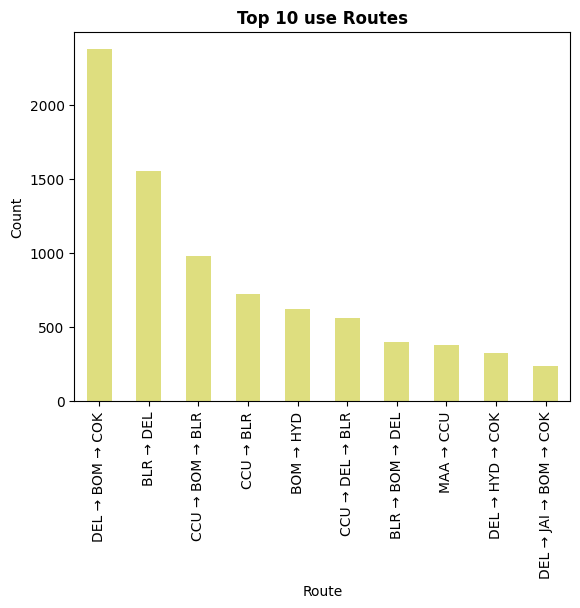

In [17]:
top_routes.plot(kind="bar" , color ="y" , alpha=0.5)
plt.title("Top 10 use Routes" , fontweight ="bold")
plt.ylabel("Count")

plt.show()

In [18]:
# Less used routes
bottom_routes = df1["Route"].value_counts().sort_values(ascending = True)[:10]
bottom_routes

,count
Route,
BOM → BBI → HYD,1
BOM → RPR → VTZ → HYD,1
BLR → CCU → BBI → HYD → VGA → DEL,1
BLR → BOM → IXC → DEL,1
BLR → HBX → BOM → NAG → DEL,1
BOM → VNS → DEL → HYD,1
BOM → JAI → DEL → HYD,1
CCU → IXB → DEL → BLR,1
BOM → GOI → HYD,1


In [19]:
# Total_Stops visualize
df1["Total_Stops"].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


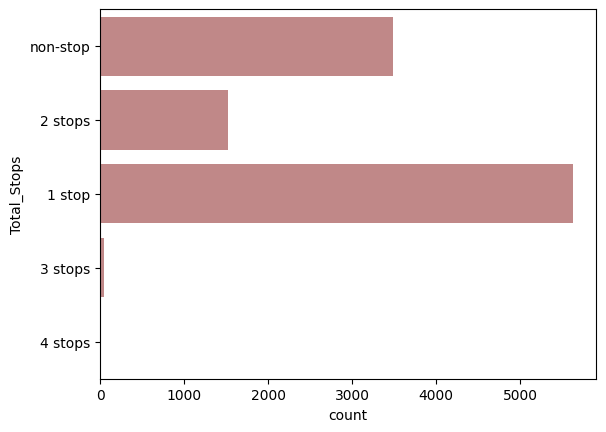

In [20]:
sns.countplot(df1["Total_Stops"] , color="brown" ,alpha=0.6)
plt.show()

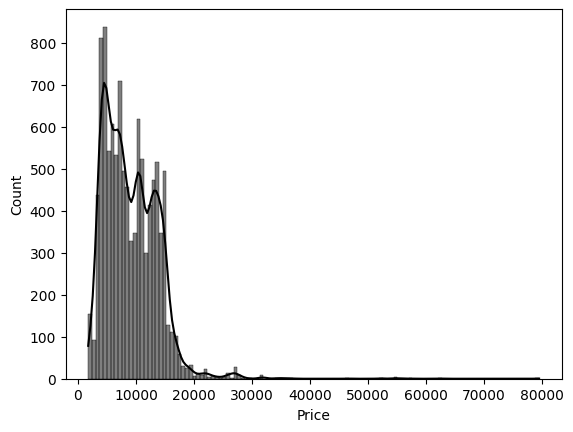

In [21]:
# plot "Price" feature using histplot
sns.histplot(df1["Price"] , kde= True , color="black")

plt.show()

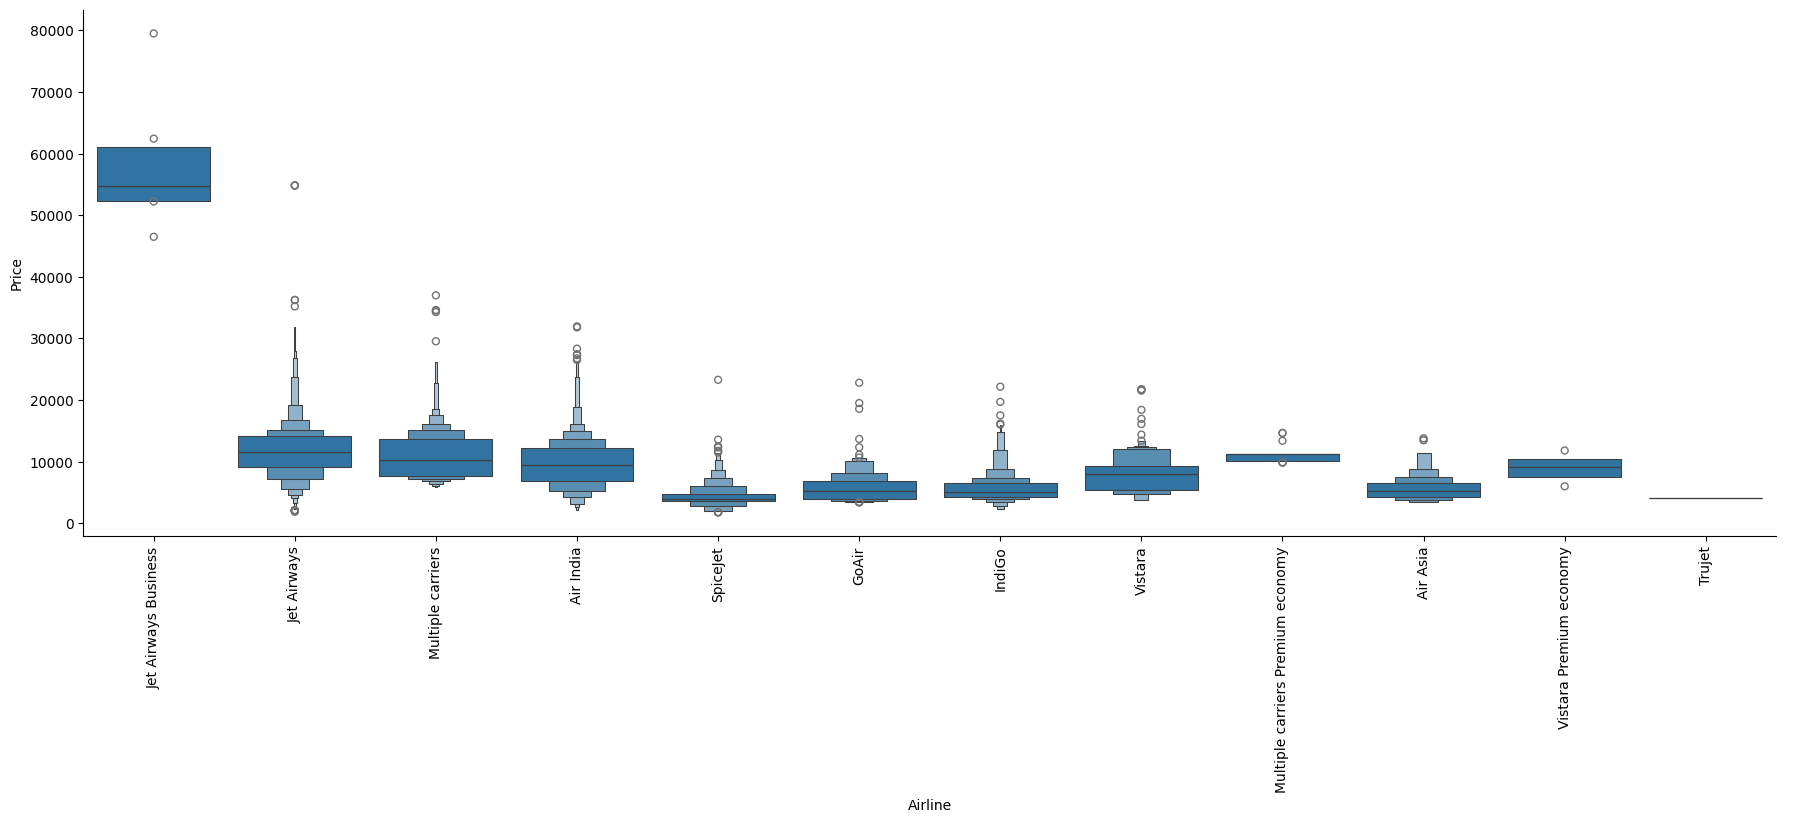

In [22]:
# plt.figure(figsize=(12,8))
sns.catplot(x="Airline" , y="Price" ,data=df1.sort_values("Price" , ascending =False) , kind = "boxen" ,height = 6, aspect=3)
plt.xticks(rotation = 90)
plt.show()

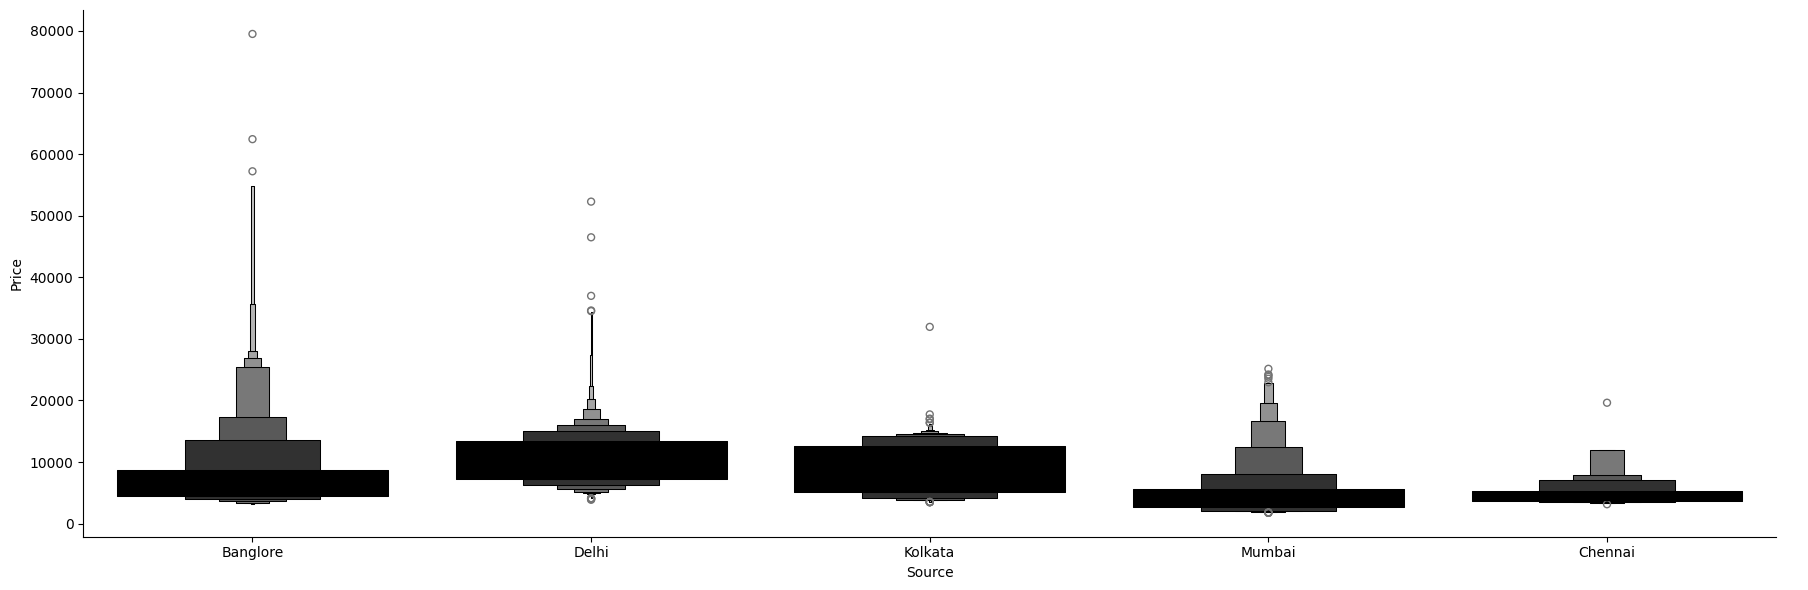

In [23]:
sns.catplot(x="Source" , y="Price" , data=df1.sort_values("Price" , ascending = False) , kind="boxen" , color = "black" ,height =6 , aspect =3)
plt.show()

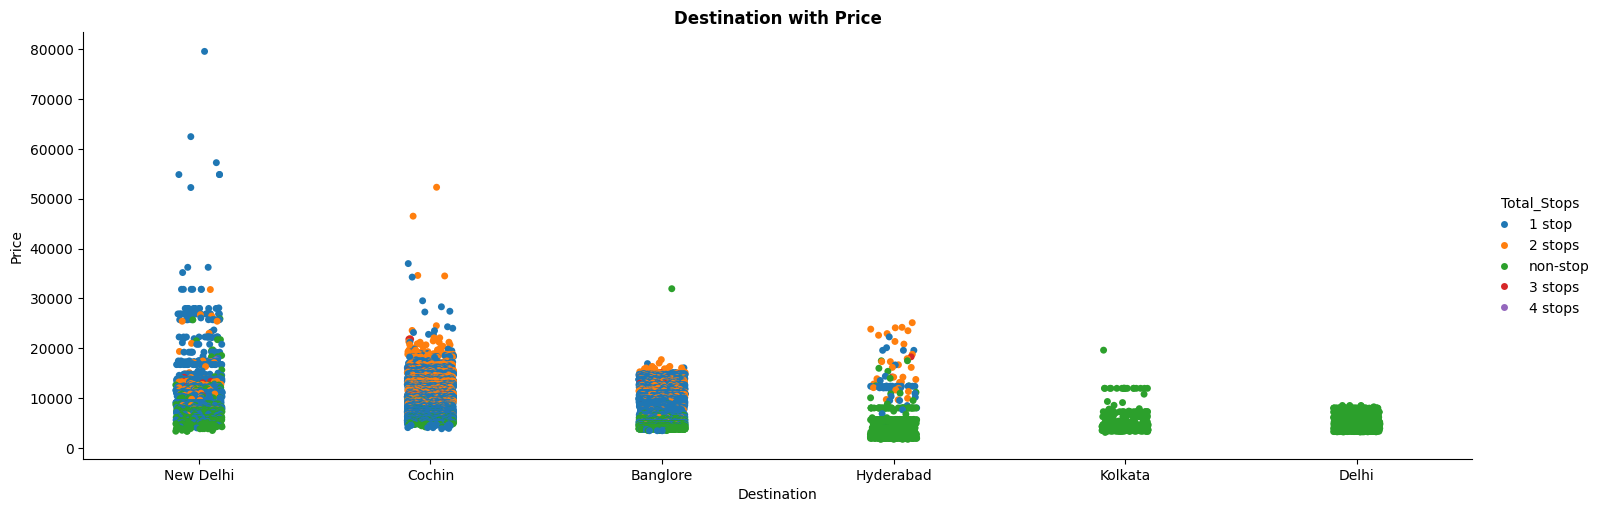

In [24]:
sns.catplot(x="Destination" , y="Price" , data=df1.sort_values("Price", ascending=False) , hue="Total_Stops"  , aspect =3)
plt.title("Destination with Price" , fontweight = "bold")
plt.show()

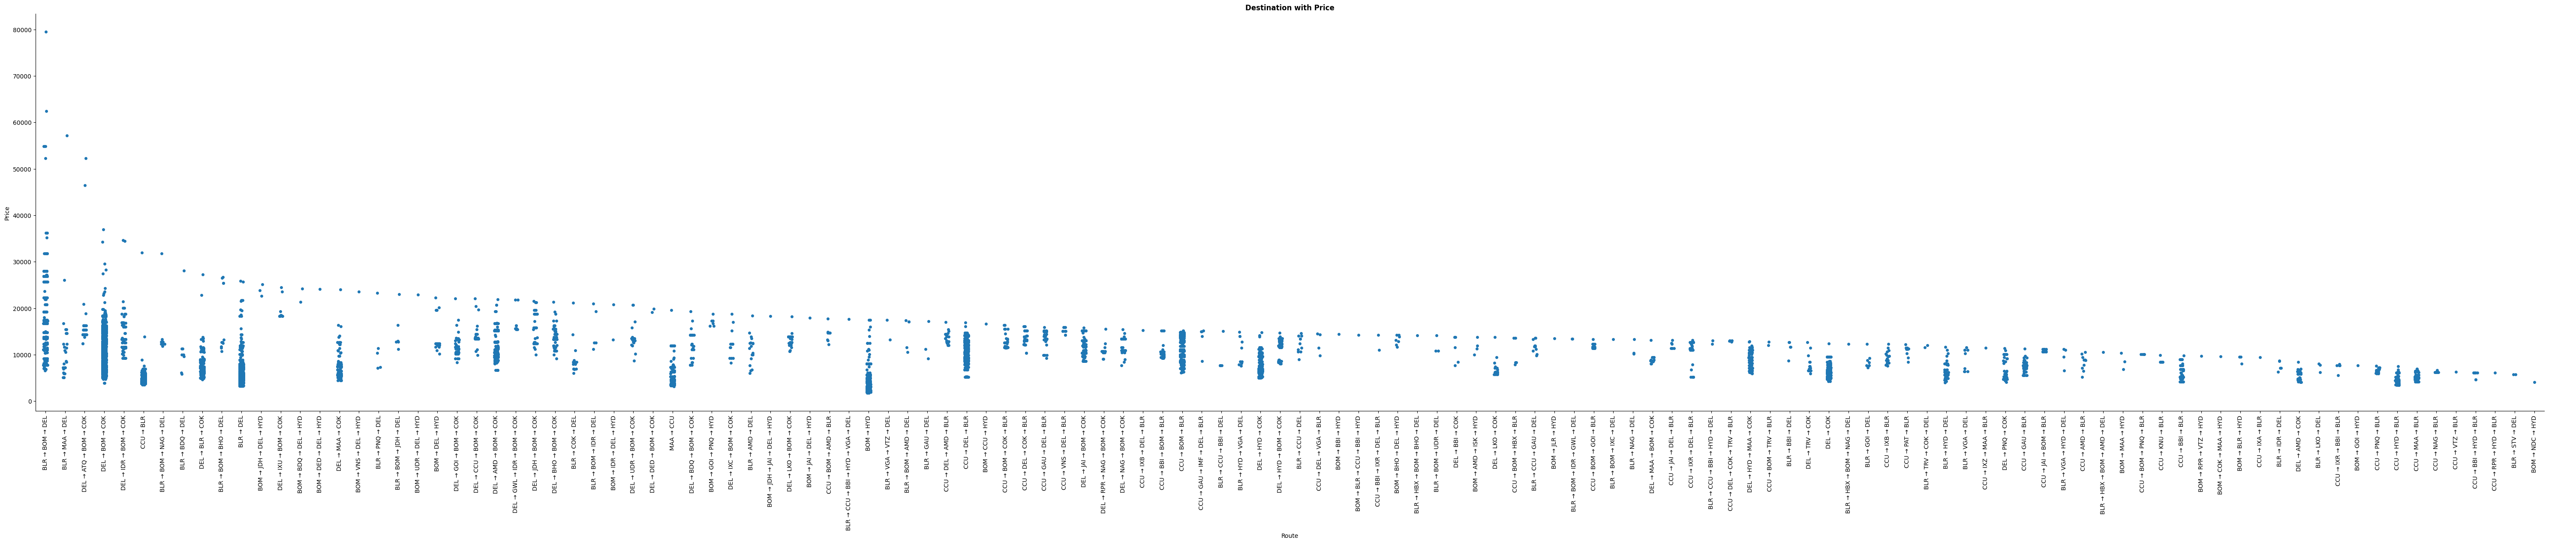

In [25]:
sns.catplot(x="Route" , y="Price" , data=df1.sort_values("Price", ascending=False) , height = 10 ,aspect =6)
plt.title("Destination with Price" , fontweight = "bold")
plt.xticks(rotation =90)
plt.show()

# **Featue Engineering**

In [26]:
# Before Feature engieering
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [27]:
df1["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [28]:
# Create a Tree Feawtures from "Date_of_Journey" Feature and drop this
df1["Date"] = df1["Date_of_Journey"].str.split("/").str[0]
df1["Month"] = df1["Date_of_Journey"].str.split("/").str[1]
df1["Year"] = df1["Date_of_Journey"].str.split("/").str[2]
# Drop "Date_of_Journey"
df1.drop("Date_of_Journey", inplace=True, axis=1)

# Convert All String  to Int
df1["Date"] = df1["Date"].astype(int)
df1["Month"] = df1["Month"].astype(int)
df1["Year"] = df1["Year"].astype(int)

In [29]:
# "Total_Stops" nan value replace with 1 stop and non-stop with 1 stop
df1["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [30]:
df1["Total_Stops"].replace(np.nan ,"1 stop" , inplace = True)

df1["Stops"] = df1["Total_Stops"].replace("non-stop" ,"1 stops")
df1["Stops"] = df1["Stops"].str.split(" ").str[0]
# convert into int
df1["Stops"] = df1["Stops"].astype(int)
# Drop "Total Stops" feature
df1.drop("Total_Stops", axis = 1 ,inplace=True)

<ipython-input-30-41aea3f3524a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Total_Stops"].replace(np.nan ,"1 stop" , inplace = True)


In [31]:

df1.head(4)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,No info,3897,24,3,2019,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,No info,13882,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,5,2019,1


In [32]:
df1["Arrival_Time"].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [33]:
#  donot need of date in "Arrival_Time" so remove only take 'time"
df1["Arrival_Time"] = df1["Arrival_Time"].str.split(" ").str[0]

In [34]:
# create a two new features "Arrival_hour" and "Arrival_min" from "Arrival_Time"
df1["Arrival_hour"] = df1["Arrival_Time"].str.split(":").str[0]
df1["Arrival_min"] = df1["Arrival_Time"].str.split(":").str[1]
# and Drop "Arrival_Time"
df1.drop("Arrival_Time", axis =1 ,inplace =True)

In [35]:
# convert into int
df1["Arrival_hour"] = df1["Arrival_hour"].astype(int)
df1["Arrival_min"] = df1["Arrival_min"].astype(int)

In [36]:
df1.head(4)

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897,24,3,2019,1,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218,12,5,2019,1,23,30


In [37]:
df1["Dep_Time"].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [38]:
# create a two new features "Dep_hour" and "Dep_min" from "Dep_Time"
df1["Dep_hour"] = df1["Dep_Time"].str.split(":").str[0]
df1["Dep_min"] = df1["Dep_Time"].str.split(":").str[1]
# and Drop "Arrival_Time"
df1.drop("Dep_Time", axis =1 ,inplace =True)

# convert into int
df1["Dep_hour"] = df1["Dep_hour"].astype(int)
df1["Dep_min"] = df1["Dep_min"].astype(int)

In [39]:
df1.head(4)

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,1,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,1,23,30,18,5


In [40]:
df1["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [41]:
df1["Additional_Info"] = df1["Additional_Info"].replace("No Info" , "No info")

In [42]:
df1["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [43]:
# create "Duration_hour" featur from "Duration"
df1["Duration_hour"] = df1["Duration"].str.split(" ").str[0]
df1["Duration_hour"] = df1["Duration_hour"].str.split("h").str[0]
# Create "Duration_min" feature
df1["Duration_min"] = df1["Duration"].str.split(" ").str[1]
df1["Duration_min"] = df1["Duration_min"].str.split("m").str[0]
# Drop Duration feature
df1.drop("Duration" ,axis = 1 , inplace =True)

In [44]:
df1["Duration_min"].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [45]:
df1["Duration_hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [46]:
df1["Duration_min"] = df1["Duration_min"].replace(np.nan , "0")
df1["Duration_hour"] = df1["Duration_hour"].replace("5m" , "5")

# convert in int
df1["Duration_min"] = df1["Duration_min"].replace(np.nan , "0")
df1["Duration_hour"] = df1["Duration_hour"].replace("5m" , "5")

In [47]:
df1.head(5)

,Airline,Source,Destination,Route,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,2019,1,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,2019,2,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,2019,2,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,2019,1,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,2019,1,21,35,16,50,4,45


In [48]:
df1["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [49]:
# Create a new 5 feature from "Route"
df1["Route_1"] = df1["Route"].str.split(" → ").str[0]
df1["Route_2"] = df1["Route"].str.split(" → ").str[1]
df1["Route_3"] = df1["Route"].str.split(" → ").str[2]
df1["Route_4"] = df1["Route"].str.split(" → ").str[3]
df1["Route_5"] = df1["Route"].str.split(" → ").str[4]

df1["Route_1"].fillna("None" , inplace =True)
df1["Route_2"].fillna("None" , inplace =True)
df1["Route_3"].fillna("None" , inplace =True)
df1["Route_4"].fillna("None" , inplace =True)
df1["Route_5"].fillna("None" , inplace =True)

# Drop "Route features"
df1.drop("Route" , axis =1 ,inplace =True)

<ipython-input-49-91171af89979>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Route_1"].fillna("None" , inplace =True)
<ipython-input-49-91171af89979>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [50]:
df1.head(5)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,1,1,10,22,20,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,2,13,15,5,50,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,2,4,25,9,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,1,23,30,18,5,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,1,21,35,16,50,4,45,BLR,NAG,DEL,None,None


In [51]:
# After feature engineering
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Additional_Info  10683 non-null  object
 4   Price            10683 non-null  int64 
 5   Date             10683 non-null  int64 
 6   Month            10683 non-null  int64 
 7   Year             10683 non-null  int64 
 8   Stops            10683 non-null  int64 
 9   Arrival_hour     10683 non-null  int64 
 10  Arrival_min      10683 non-null  int64 
 11  Dep_hour         10683 non-null  int64 
 12  Dep_min          10683 non-null  int64 
 13  Duration_hour    10683 non-null  object
 14  Duration_min     10683 non-null  object
 15  Route_1          10683 non-null  object
 16  Route_2          10683 non-null  object
 17  Route_3          10683 non-null

In [52]:
df1.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Additional_Info,0
Price,0
Date,0
Month,0
Year,0
Stops,0
Arrival_hour,0


No Null value in data_set

In [53]:
df1.head(5)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,1,1,10,22,20,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,2,13,15,5,50,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,2,4,25,9,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,1,23,30,18,5,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,1,21,35,16,50,4,45,BLR,NAG,DEL,None,None


Remove Year column beacause this data from same year

In [54]:
df1.drop("Year",axis = 1,inplace = True)

# **Model Training**

In [55]:
# LabelEncode
label = LabelEncoder()

In [56]:
# apply Label Encoder
for i in df1.columns:
    if df1[i].dtype == "object":
        df1[i] = label.fit_transform(df1[i])

In [57]:
df1

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,7,3897,24,3,1,1,10,22,20,11,10,0,10,21,10,4
1,1,3,0,7,7662,1,5,2,13,15,5,50,40,4,2,20,1,3,4
2,4,2,1,7,13882,9,6,2,4,25,9,25,10,0,3,27,4,5,4
3,3,3,0,7,6218,12,5,1,23,30,18,5,38,4,2,29,3,10,4
4,3,0,5,7,13302,1,3,1,21,35,16,50,33,8,0,29,7,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,7,4107,9,4,1,22,25,19,55,11,5,2,5,21,10,4
10679,1,3,0,7,4145,27,4,1,23,20,20,45,11,6,2,5,21,10,4
10680,4,0,2,7,7229,27,4,1,11,20,8,20,22,0,0,10,21,10,4
10681,10,0,5,7,12648,1,3,1,14,10,11,30,11,7,0,10,21,10,4


In [58]:
df1 = df1.reset_index()

In [59]:
# seprate dependent and independent features
x = df1.drop("Price" , axis =1)
y= df1["Price"]

In [60]:
print(f"shape of x is {x.shape}")
print(f"shape of y is {y.shape}")

shape of x is (10683, 19)
shape of y is (10683,)


In [61]:
x.head()

,index,Airline,Source,Destination,Additional_Info,Date,Month,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3,0,5,7,24,3,1,1,10,22,20,11,10,0,10,21,10,4
1,1,1,3,0,7,1,5,2,13,15,5,50,40,4,2,20,1,3,4
2,2,4,2,1,7,9,6,2,4,25,9,25,10,0,3,27,4,5,4
3,3,3,3,0,7,12,5,1,23,30,18,5,38,4,2,29,3,10,4
4,4,3,0,5,7,1,3,1,21,35,16,50,33,8,0,29,7,10,4


In [62]:
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


**Sepreate Train and test data**

In [63]:
x_train,x_test , y_train,y_test = train_test_split(x,y , test_size = 0.25 , random_state = 42)

In [64]:
print(f"shape of x_train is {x_train.shape}")
print(f"shape of x_test is {x_test.shape}")
print(f"shape of y_train is {y_train.shape}")
print(f"shape of y_test is {y_test.shape}")

shape of x_train is (8012, 19)
shape of x_test is (2671, 19)
shape of y_train is (8012,)
shape of y_test is (2671,)


# **Lasso for features importance**

In [65]:
model_Lasso = SelectFromModel(Lasso(alpha = 0.005,max_iter=500 , random_state = 0))
model_Lasso.fit(x_train , y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, max_iter=500, random_state=0))

In [66]:
 model_Lasso.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [67]:
x_train.columns[(model_Lasso.get_support())]

Index(['index', 'Airline', 'Source', 'Destination', 'Additional_Info', 'Date',
       'Month', 'Stops', 'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
       'Duration_hour', 'Duration_min', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5'],
      dtype='object')

These are over Selected Features

In [68]:
etr = ExtraTreesRegressor()
etr.fit(x_train , y_train)

ExtraTreesRegressor()

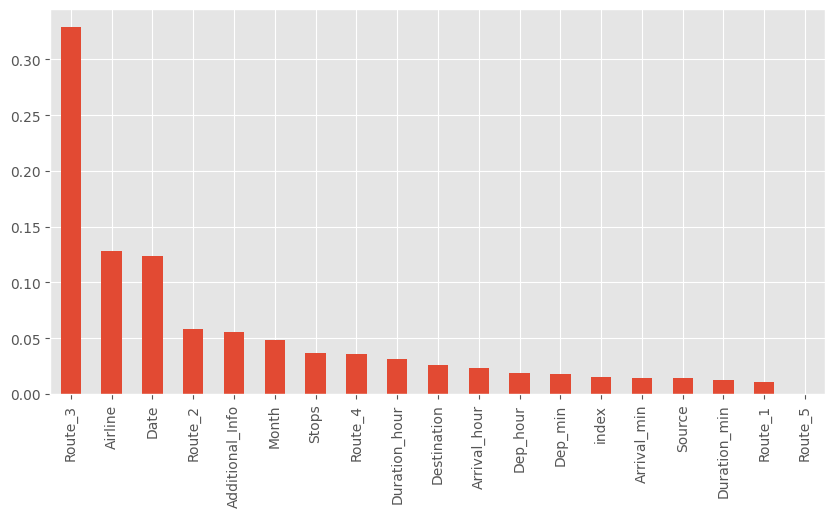

In [69]:
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
feature_imp = pd.Series(etr.feature_importances_ , index=x.columns)
feature_imp.nlargest(35).plot(kind="bar")
plt.show()

# **Dicision Tree**

In [70]:
model_DT = DecisionTreeRegressor()
model_DT.fit(x_train , y_train)

DecisionTreeRegressor()

In [71]:
predict_DT = model_DT.predict(x_test)

In [72]:
scoreDT = r2_score(predict_DT , y_test)
scoreDT

0.8514926268275407

In [73]:
print("MSE -->> ",mean_squared_error(predict_DT , y_test))
print("MAE -->> ",mean_absolute_error(predict_DT , y_test))
print("SMSE -->> ",np.sqrt(mean_squared_error(predict_DT , y_test)))

MSE -->>  3115325.287907151
MAE -->>  733.7027330587795
SMSE -->>  1765.0284099433502


# **RandomForestRegressor**

In [74]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [75]:
predrfr = rfr.predict(x_test)

In [76]:
rfr.score(x_train , y_train)

0.9836409002285235

In [77]:
rfr.score(x_test , y_test)

0.9017638173753865

In [78]:
print("MAE" , mean_absolute_error(y_test ,predrfr ))
print("MSE" ,mean_squared_error(y_test , predrfr ))
print("rmse " ,np.sqrt(mean_squared_error(y_test , predrfr )))

MAE 672.446701609884
MSE 2006707.3352962187
rmse  1416.5829786130494


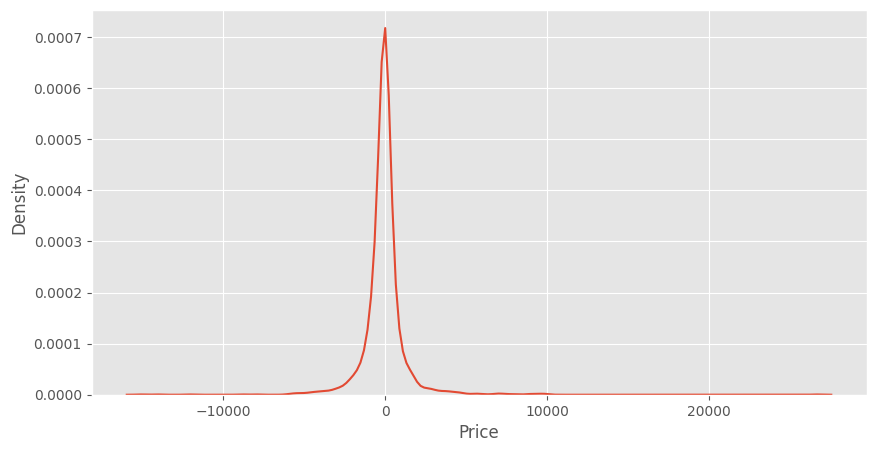

In [79]:
plt.figure(figsize=(10,5))
sns.kdeplot(y_test-predrfr)
plt.show()

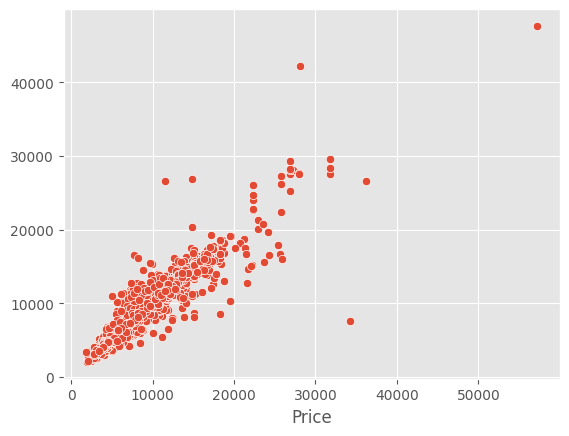

In [80]:
sns.scatterplot(x=y_test , y=predrfr)
plt.show()

In [81]:
scorerfr = r2_score(predrfr , y_test)
print("R2_Scoe " , scorerfr)

R2_Scoe  0.8917229810521998


**Hyper Tunning Over Model**

In [82]:
rfrhp = RandomForestRegressor(random_state=42)

In [83]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15 , stop=2000 , num=15)]

max_features = ["sqrt", "log2", None]

# criterion = ["squared_error", "absolute_error", "friedman_mse", "poisson"] # #   This take a long time in fitting time soo i can comment this and fir without this
# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2,20,4)]

min_samples_split=[2,3,4,5,6,7,15,30,10,20,40,50,70,100]

min_samples_leaf=[1,2,3,4,5,6,7,8,9,10]

In [84]:
parametersfr = {"n_estimators" : n_estimators , "max_features" : max_features ,
             "max_depth":max_depth , "min_samples_split":min_samples_split ,"min_samples_leaf":min_samples_leaf }

In [85]:
rfrCV = RandomizedSearchCV(estimator= rfrhp , param_distributions=parametersfr , scoring = "neg_mean_squared_error" , cv =5,
                          random_state = 0 , verbose = 2 , n_iter=50,)

In [86]:
rfrCV.fit(x_train ,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=298; total time=   0.7s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=298; total time=   0.9s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=298; total time=   1.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=298; total time=   1.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=298; total time=   1.0s
[CV] END max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=7, n_estimators=2000; total time=  40.5s
[CV] END max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=7, n_estimators=2000; total time=  36.4s
[CV] END max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=7, n_estimators=2000; to

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [2, 8, 14, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              15, 30, 10, 20,
                                                              40, 50, 70, 100],
                                        'n_estimators': [15, 156, 298, 440, 582,
                                                         723, 865, 1007, 1149,
                                                         1291, 1432, 1574, 1716,
                                                         1858, 2000]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [87]:
rfrCV.best_params_

{'n_estimators': 440,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 14}

In [90]:
rfrCV.best_score_

-3045457.8614663584

In [91]:
pred_rfrCV = rfrCV.predict(x_test)

In [92]:
print("MSE " ,mean_squared_error(pred_rfrCV ,y_test))
print("MAE " ,mean_absolute_error(pred_rfrCV ,y_test))
print("RMSE " ,np.sqrt(mean_absolute_error(pred_rfrCV ,y_test)))

MSE  2060683.9246994897
MAE  712.3540759456631
RMSE  26.68996208213236


In [93]:
r2_score(pred_rfrCV,y_test)

0.8887313826081589

**Used find hyper parameters**

In [131]:
# Used find hyper parameters
rfrHP = RandomForestRegressor(n_estimators = 1432, min_samples_split = 7 , min_samples_leaf = 1, max_features= None, max_depth= 50)

In [132]:
rfrHP.fit(x_train,y_train)

RandomForestRegressor(max_depth=50, max_features=None, min_samples_split=7,
                      n_estimators=1432)

In [133]:
predrfrHP = rfrHP.predict(x_test)

In [134]:
print("MSE " ,mean_squared_error(predrfrHP ,y_test))
print("MAE " ,mean_absolute_error(predrfrHP ,y_test))
print("RMSE " ,np.sqrt(mean_absolute_error(predrfrHP ,y_test)))

MSE  2016373.36739893
MAE  683.604765203413
RMSE  26.145836479321385


In [135]:
scorerfrHP = r2_score(predrfrHP, y_test)
scorerfrHP

0.8903698000348109

# **SVR**

In [129]:
from sklearn.svm import SVC

In [130]:
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [126]:
pred_svc = svc_model.predict(x_test)

In [127]:
print("MSE " ,mean_squared_error(pred_svc ,y_test))
print("MAE " ,mean_absolute_error(pred_svc ,y_test))
print("RMSE " ,np.sqrt(mean_absolute_error(pred_svc ,y_test)))

MSE  21852481.714713592
MAE  3808.0943466866343
RMSE  61.70975892585089


In [128]:
r2_score(pred_svc ,y_test)

0.0

# **GradientBoostingRegressor**

In [145]:
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
# Fit the model on the training data
gbr_model.fit(x_train, y_train)


GradientBoostingRegressor()

In [148]:
# Make predictions using the predict method
gbr_pred = gbr_model.predict(x_test)

In [151]:
print("MSE " ,mean_squared_error(gbr_pred ,y_test))
print("MAE " ,mean_absolute_error(gbr_pred ,y_test))
print("RMSE " ,np.sqrt(mean_absolute_error(gbr_pred ,y_test)))

MSE  3372851.470950446
MAE  1249.743018157504
RMSE  35.35170460045037


In [152]:
r2_score(gbr_pred ,y_test)

0.7898466828117556